### import package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### import Data

In [23]:
dt =  pd.read_csv('FuelConsumption.csv')
dt.drop(['Unnamed: 0'],axis=1,inplace=True)
dt.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Separando caracteristicas especificas

In [26]:
mini_dt = dt[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mini_dt.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### PLot 

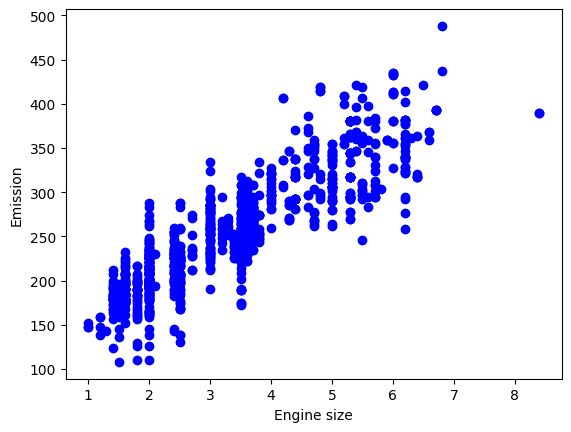

In [29]:
plt.scatter(mini_dt.ENGINESIZE, mini_dt.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

In [32]:
msk = np.random.rand(len(dt)) < 0.8
train = mini_dt[msk]
test = mini_dt[~msk]

### Polynomial regression

Às vezes, a tendência dos dados não é realmente linear e parece curvilínea. Neste caso, podemos usar métodos de regressão polinomial. Na verdade, existem muitas regressões diferentes que podem ser usadas para ajustar a aparência do conjunto de dados, como quadrático, cúbico e assim por diante, e pode continuar em graus infinitos.

Em essência, podemos chamar tudo isso de regressão polinomial, em que a relação entre a variável independente x e a variável dependente y é modelada como um polinômio de grau n em x. Digamos que você queira ter uma regressão polinomial (vamos fazer um polinômio de 2 graus):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Agora, a questão é: como podemos ajustar nossos dados nessa equação enquanto temos apenas valores x, como **Engine Size**?
Bem, podemos criar alguns recursos adicionais: 1, $x$ e $x^2$.

**PolynomialFeatures()** na biblioteca Scikit-learn, conduz um novo conjunto de recursos do conjunto de recursos original. Ou seja, será gerada uma matriz composta por todas as combinações polinomiais das características com grau menor ou igual ao grau especificado. Por exemplo, digamos que o conjunto de recursos original tenha apenas um recurso, *ENGINESIZE*. Agora, se selecionarmos o grau do polinômio como 2, ele gerará 3 recursos, grau=0 -> b, grau=1 ->$\theta\_1$ e grau=2 ->$\theta\_2$:

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Separando a parte as variaveis independente e dependente 
# Para o Treino.
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Para o Teste.
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [34]:
# Criando uma estrutura para modelar os dados
poly = PolynomialFeatures(degree=2)
poly

PolynomialFeatures()

In [36]:
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

O que ele faz  na celular a cima é :

1° Anlaisa qual a ordem do polinomia definido em "poly".
Nesse caso é 2.

2° Pega o primeiro elemento da primeira linha e retorno os valores da varivael de entrada para de acorod com o polinomio do grau escolhido.
Nesse caso a primeira é sempre [1, x , x^2]

A sacada aqui é : 
Antes precisavamo de um polinomio do segundo grau para fitar a curva
e descobrir quais são os coeficiente dele. 

Que para esse caso  $y = b + \theta_1  x + \theta_2 x^2$ são b, $\theta_1$ e $\theta_2$, com as multiplicado por 1, x e x^2 .

Utilizando a função PolynomialFeatures(degree=2) e fit_transform(), convertemos nosss dados que era n linha e uma coluna, onde cada linha era um termo de x ->$[x]$, em uma matriz com 3 colunas->$[1, x , x^2]$. 

No qual podemos chamar  x ->$x_1$ e $x^2$ ->$x_2$, assim 
$$y = b + \theta_1  x_1 + \theta_2 x_2$$
para enttão poder usar o modelo de regressão linear e encontrar os coeficiente

In [42]:
R = linear_model.LinearRegression()
train_y_ = R.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', R.coef_)
print ('b: ',R.intercept_)

Coefficients:  [[ 0.         47.82551943 -1.12638919]]
b:  [111.15985451]


Note que esse zero , é por que a o primeiro coeficiente é relatico a  primiera entrada  de train_x_poly que são todos 1.

Caso não fosse zero teriamo algo assim :
$$y = b +\theta_0 x_0 +  \theta_1  x_1 + \theta_2 x_2$$

lebra que $\theta_0$ é a angulação da curva , logo se todos os valores são constante a angulação é zero.

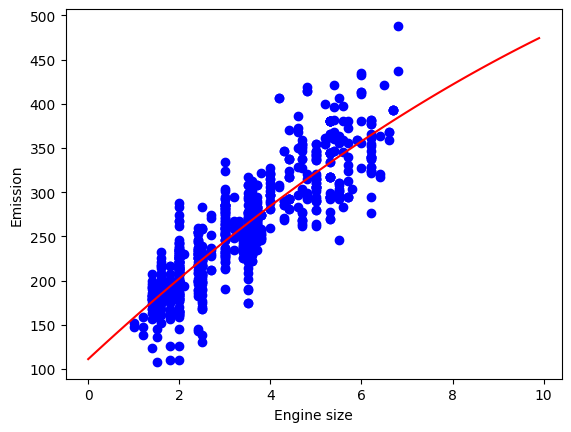

In [45]:
XX = np.arange(0, 10, 0.1)
Y = R.intercept_[0]+ R.coef_[0][1]*XX+ R.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, Y, '-r' )

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Analisando o modelo

Vamos usar os dados de teste e avaliar se ele esta fazendo um boa prediçao com o modelo

In [47]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_     = R.predict(test_x_poly)

print("Mean absolute error: ", np.mean(np.absolute(test_y_ - test_y)))
print("MSE:", np.mean((test_y_ - test_y)**2))
print("R2-score:", r2_score(test_y,test_y_ ) )

Mean absolute error:  24.657531003912403
MSE: 1077.0818217930944
R2-score: 0.7519944733483117


MAE está dizendo que o erro médio é de 24, isso idica que na media os valores são descirado em 24 pontos, exemplo se o valor era 124 a prediçao esta dizendo 100 ou 148.

MSE é a media do quadrado da diferença, Esse é ruim de avaliar.

Score o caso perfeito é 1.